# Data Input and Output

According to a popular model, the elements of data science are:

* Obtaining data
* Scrubbing data
* Exploring data
* Modeling data
* iNterpreting data

and hence the acronym OSEMN, pronounced as “Awesome”.

We will start with the **O**, and let's have a quick look at what it all boils down to:

In [ ]:
# O: obtaining data
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

In [1]:
# S: scrubbing data
import numpy as np
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T # trick: columns to variables
# this is not real scrubbing, rather a simple operation to better handle the data

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


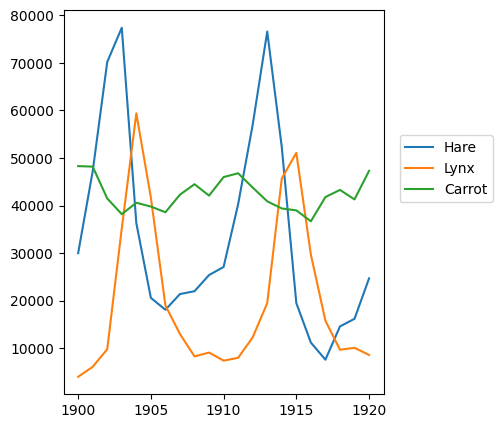

In [2]:
# E: exploring data
!cat data/populations.txt

from matplotlib import pyplot as plt
%matplotlib inline

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

In [ ]:
# M: modeling

By plotting the data a clear (and reasonable) correlations between pray and predator becomes evident.

 - How can it be quantified?
 - Is that statistical significant?
 - What about the correlation between carrots and hares? And hares and lynxes?
 
 We will deal with data modeling in few weeks, when we will learn to fit the data.

In [ ]:
# N: interpreting

Finding correlations in data is one of the main goals of data science, though that is not the end of the story: as this interesting [site](http://tylervigen.com/spurious-correlations) demonstrates, **correlations does not imply causation**.

## Obtaining and processing data

Accessing data may not be as easy as it seems. The previous example, where the data is stored on your own machine, represents the simplest (but alas, less common) case. Data is usually stored on remote machines, which can be either *publicly accessible* (everyone can access the data, even without credentials) rather than *private*. In the case of the former, things may be straightforward, whereas in the latter case you need to worry about a few things.

In both cases, depending on the size of the dataset, the managment of the dataset can become extremely complicated. We won't deal here with large datasets (which require a whole course *per se*), but still we should pay attention to few basic things: for instance, *it is not wise to keep (and even worse commit) data into a git repository*!

The suggestion is then to create a directory somewhere and copy the example datasets there. From a terminal:

```bash

# create a data directory in your home directory
mkdir data/

# check the content (it's empty now of course)
ls -ltr data/

# in the case you need to move there:
cd data/

# if you need to copy a file
cp data/data_original.txt data/data_copy.txt
```

### Public data

An increasingly number of institutions, reaserch centers, experiments, ... are making their data public.

A nice set of interesting datasets can be found on this [server](https://archive.ics.uci.edu/ml/datasets.php) that collects training/test data for machine learning developments. Several of those belong to physical sciences, and may be worth a look. Since they are public, you can freely download any of those. However, they usually come with a license (e.g. you won't be allowed to make profit from them), and deserve a reference in your paper, if you publish some result.

Sometimes, they are used as the input to machine learning challenges, where different groups compete to achieve the best result.

In the following, we consider a dataset from the MAGIC experiment. We will get them with the `wget` command:

In [ ]:
# download the dataset and its description to the data/ directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/    

In [5]:
# read the metadata file. This can (and should) be done from a terminal
!cat data/magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

### Accessing the data without downloading the file(s)

It is possible to download and load remote files via their url from within python (and thus on a jupyter session). This is a rather powerful tool as it allows http communications, I/O streaming and so on.

Care should be put as the dataset is stored in memory.

In [6]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names'
with urllib.request.urlopen(url) as data_file:
    #print(data_file.read(300))
    for line in data_file:
        print(line)

b'1. Title of Database: MAGIC gamma telescope data 2004\n'
b'\n'
b'2. Sources:\n'
b'\n'
b'   (a) Original owner of the database:\n'
b'\n'
b'       R. K. Bock\n'
b'       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)\n'
b'       http://wwwmagic.mppmu.mpg.de\n'
b'       rkb@mail.cern.ch\n'
b'\n'
b'   (b) Donor:\n'
b'\n'
b'       P. Savicky\n'
b'       Institute of Computer Science, AS of CR\n'
b'       Czech Republic\n'
b'       savicky@cs.cas.cz\n'
b'\n'
b'   (c) Date received: May 2007\n'
b'\n'
b'3. Past Usage:\n'
b'\n'
b'   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,\n'
b'       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,\n'
b'       Vaicilius, A., Wittek W. (2004).\n'
b'       Methods for multidimensional event classification: a case study\n'
b'       using images from a Cherenkov gamma-ray telescope.\n'
b'       Nucl.Instr.Meth. A, 516, pp. 511-528.\n'
b'\n'
b'   (b) P. Savicky, E. Kotrc.\n'
b'       Experimental Stu

###  Copy data from a remote machine: SSH and SCP

Often datasets are not available on websites, but rather they are stored on some remote machine. Several tools have been developed allow you to get remote data, even from within Python (e.g. [paramiko](https://www.paramiko.org/)), but it's often enough to get a local copy.

The connection to a remote machine is usually performed through an **SSH** (Secore SHell) connection.
The Secure Shell Protocol (SSH) is a cryptographic network protocol to perform remote login and command-line execution on a remote machine.

The unix `scp` command is of great help in this case. It allows to copy a file from/to a remote machine using an SSH connection. Its syntax resembles the one of the `cp` command, e.g. from a terminal:

```bash
scp username@machinename.unipd.it:/path/to/the/file/filename.* path/to/the/target/
```

The `scp` works provided that you have the necessary permissions and authorization to log in to the remote machine, and you know the location of the files within that machine. This seems trivial, but it's one of the most difficult aspects you will have to deal when trying to obtain the data.

However, it could be worse. Especially in large reaserch centers or companies, the remote machine `R` is often not accessible from "outside", meaning that it is hidden behind a firewall. In that case you may need to use to access to a *gate* machine `G` first (with very limited disk space and functionality), and only then you can connect to the machine. This also means that you cannot run the `scp` command twice to get the data.

The simplest solution is to create an `ssh` tunnel:

``` bash
ssh -L port:<address of R known to G>:22 <user at G>@<address of G> 

scp -P port <user at R>@localhost:/path/to/the/file file-name-to-be-copied
```

where `port` is the port number which is a number between 1025 and 65535, `R` is the machine where the files are located, `G` is the gate, and `user` is the username.

The first command creates a connection to `G` and redirects your local port `port` to port 22 of `R`, so that you can connect to port 22 of `R` with `ssh` or `scp` (second command).
It could happen that the chosen port number is already in use: in that case just pick another unused port.

In summary, just getting the data could be complicated.

## Data Formats

Datasets can be stored in several different ways. Sometimes, they have formats which are application-dependent, even though more and more standards are being established.

#### Proprietary (closed) formats

In some of those cases, the format of the data is proprietary, meaning that the software house does not provide the documentation needed to read and write the data in that format. We won't cover those cases in this course, and there are a number of reasons to avoid them.

#### Open formats

In case an open, widely-accepted data formats, Python has "readers" for most of these, another reason for being the optimal programming language for data analysis. In the follwing, we will explore the most common ones.

### Text files 

Plain text files are very common, and are used for "readibility", at the price of a poor storing efficiency. [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the most common encoding.

Reading (and writing) text files in Python is straightforward:

In [8]:
file_name = "data/magic04.data"
file = open(file_name, 'r') # opening a file in read only  mode
str1 = file.readline()
print(str1)
file.close() # closing the file

28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g



However, you **always** need to explicitly close the file with `file.close()`.

Pay attention to the `mode`:
  -  `w` : the file will be opened in write only mode. If a file is opened in `w` mode and a file already exists then the existing files content will be overwritten
  -  `r` : the file will be opened in read only mode. This is the default mode
  -  `a` : the file will be opened in append mode and the data will be written at the end of the file
  -  `r+` : the file will be opened in read and write mode
  -  `b` : the file will be opened in the binary mode (see later)

You can also specify more than one *mode*, for instance `rb`.

An alternative syntax, that is equivalent to the previous one:

In [9]:
file_name = "data/magic04.data"
n = 0

# mode can be specified for writing, reading or both
with open(file_name, mode = 'r') as f:
    # print-out the whole file
    # print(f.read()) 
    for line in f:
        print(n, ":")
        # print line by line
        print(line)
        # each line is a string, you need to split it yourself
        #for c in line.split(','): print("  ", c) # check the functionalities of the split() method
        n += 1
        if n > 10: break

0 :
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g

1 :
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g

2 :
162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g

3 :
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.449,116.737,g

4 :
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.648,356.462,g

5 :
51.624,21.1502,2.9085,0.242,0.134,50.8761,43.1887,9.8145,3.613,238.098,g

6 :
48.2468,17.3565,3.0332,0.2529,0.1515,8.573,38.0957,10.5868,4.792,219.087,g

7 :
26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.456,-2.9292,0.812,237.134,g

8 :
96.2327,46.5165,4.154,0.0779,0.039,110.355,85.0486,43.1844,4.854,248.226,g

9 :
46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.875,102.251,g

10 :
62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.771,9.9144,323.094,g



In this example, the file was automatically closed at the end of the indentation block.

Similarly, it's possible to write files to a txt file:

In [10]:
out_file_name = "data/magic04.out"

with open(out_file_name, 'w') as outfile:
    outfile.write(line + '\n') # write last line of the previous example to a file

!cat data/magic04.out

62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.771,9.9144,323.094,g



### CSV files

Text files are already framed into a defined structured, in a "table-like" manner. If the values/features/attributes are separated with a comma, these files are colled "comma separated values" (CSV), even though the separator may well not be the `,` symbol. It could also happen that the separator is a whitespace, or a tab character.

Python has a package to deal with those, named `csv`:

In [11]:
import csv

n = 0

with open('data/magic04.data') as data_file:
    for line in csv.reader(data_file, delimiter=','): # the delimiter is often guessed by the reader
        #print(line) # all items treated as strings
        # again note that elements of each line are treated as strings
        # if you need to convert them into numbers, you need to to that yourself
        fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist = map(float, line[:-1])
        category = line[-1]
        print(fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist, category)
        n += 1
        if n > 10: break

28.7967 16.0021 2.6449 0.3918 0.1982 27.7004 22.011 -8.2027 40.092 81.8828 g
31.6036 11.7235 2.5185 0.5303 0.3773 26.2722 23.8238 -9.9574 6.3609 205.261 g
162.052 136.031 4.0612 0.0374 0.0187 116.741 -64.858 -45.216 76.96 256.788 g
23.8172 9.5728 2.3385 0.6147 0.3922 27.2107 -6.4633 -7.1513 10.449 116.737 g
75.1362 30.9205 3.1611 0.3168 0.1832 -5.5277 28.5525 21.8393 4.648 356.462 g
51.624 21.1502 2.9085 0.242 0.134 50.8761 43.1887 9.8145 3.613 238.098 g
48.2468 17.3565 3.0332 0.2529 0.1515 8.573 38.0957 10.5868 4.792 219.087 g
26.7897 13.7595 2.5521 0.4236 0.2174 29.6339 20.456 -2.9292 0.812 237.134 g
96.2327 46.5165 4.154 0.0779 0.039 110.355 85.0486 43.1844 4.854 248.226 g
46.7619 15.1993 2.5786 0.3377 0.1913 24.7548 43.8771 -6.6812 7.875 102.251 g
62.7766 29.9104 3.3331 0.2475 0.1261 -33.9065 57.5848 23.771 9.9144 323.094 g


Sometimes, csv files have comments (e.g. starting with `#`), which cannot be interpreted by the reader. Tricks like:

```python
csv.reader(row for row in f if not row.startswith('#'))
```

may be useful to skip those lines.

#### Reading and writing txt and csv files with Numpy and Pandas

Numpy provides the useful methdod `np.loadtxt()` to read txt files, as we have seen in the introduction.

Pandas itself provides integrated and convenient tools to read and write CSV files with the `read_csv()` method of DataFrames:

In [ ]:
# copy the unpacked version
#!wget https://www.dropbox.com/s/ga9wi6b40cakgae/data_000637.txt -P data/

In [12]:
import pandas as pd
file_name= "data/data_000637.txt"
data = pd.read_csv(file_name, nrows=10, skiprows=range(1,1))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Note that Pandas is smart enough to determine that the first row consists of the headers of each column:

In [13]:
print(data.columns)
#!cat data/data_000637.txt

Index(['HEAD', 'FPGA', 'TDC_CHANNEL', 'ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'], dtype='object')


Columns can be specified when reading the file, if they do not exist. An example:

In [14]:
import pandas as pd
file_name = "data/magic04.data"
data = pd.read_csv(file_name, nrows=1000, names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'category'])
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
995,20.0489,9.2926,2.4014,0.6429,0.4226,4.1464,-14.5626,10.2506,25.8830,187.8470,g
996,13.3396,10.5628,2.1917,0.7910,0.4019,-14.8910,-2.3901,11.9001,10.7959,182.9100,g
997,49.8521,11.4525,2.3971,0.4529,0.2305,52.6071,39.3622,-8.6905,6.0457,183.4950,g
998,29.2688,14.2779,2.5723,0.4016,0.2021,-21.2132,-23.9344,-8.2073,47.5590,102.7790,g


### JSON files

JSON stands for JavaScript Object Notation, and is a format widely used for web-based resource sharing. It is very similar in structure to a Python nested dictionary. It is humand readable (then human-editable), even if readability may be difficult for complex data structures. Its use is convenient in Python, as its items can be accessed by key. Here is an example http://json.org/example:

In [15]:
%%file data/example.json
{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}

Writing data/example.json


In [16]:
!cat data/example.json

{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}


Python includes a dedicated module, called just `json`, that allows to import a json file as a (nested) Python dict:

In [17]:
import json # import the JSON module
data = json.load(open('data/example.json'))
print("Type:", type(data))
print(data)

Type: <class 'dict'>
{'glossary': {'title': 'example glossary', 'GlossDiv': {'title': 'S', 'GlossList': {'GlossEntry': {'ID': 'SGML', 'SortAs': 'SGML', 'GlossTerm': 'Standard Generalized Markup Language', 'Acronym': 'SGML', 'Abbrev': 'ISO 8879:1986', 'GlossDef': {'para': 'A meta-markup language, used to create markup languages such as DocBook.', 'GlossSeeAlso': ['GML', 'XML']}, 'GlossSee': 'markup'}}}}}


And the (nested) dict can be parsed using standard key lookups:

In [18]:
data['glossary']['GlossDiv']['GlossList']['GlossEntry']['GlossTerm']

'Standard Generalized Markup Language'

### Pickle

Sometimes, you may want to save and read more complex Python data structures than int, floats and strings, as for example dictionaries, tuples, lists, or even more complex objects.

In these cases, the `pkl` format is very handful. Pickle is used for serializing and de-serializing Python object structures, also called flattening. Serialization consists of converting an object in memory to a byte stream that can be stored on disk. Later on, this character stream can then be retrieved and de-serialized back to a Python object.

There are fundamental differences between the pickle protocols and JSON (JavaScript Object Notation):

- JSON is a text serialization format (it outputs unicode text, although most of the time it is then encoded to utf-8), while pickle is a binary serialization format;

- JSON is human-readable, while pickle is not;

- JSON is interoperable and widely used outside of the Python ecosystem, while pickle is Python-specific;

- JSON, by default, can only represent a subset of the Python built-in types, and no custom classes; pickle can represent an extremely large number of Python types (many of them automatically, by clever usage of Python’s introspection facilities; complex cases can be tackled by implementing specific object APIs);

- Unlike pickle, deserializing untrusted JSON does not in itself create an arbitrary code execution vulnerability.

In [21]:
import pickle

# define the data structure
ages_dict = {'Fido' : 3, 'Laika' : 16, 'Skipper' : 10, 'Balou' : 9}

filename = "data/dog_ages.pkl"

outfile = open(filename, 'wb') # note: no filename extension. 'wb' stands for w: write and b: binary
pickle.dump(ages_dict, outfile) # "dump" the data to pkl
outfile.close() # remember to close the file

!dir data

 Il volume nell'unit� C � Windows 
 Numero di serie del volume: C07B-A605

 Directory di c:\Users\ecapo\Desktop\Uni\SCP\ScientificComputingWithPython2023\data

23/11/2023  12:34    <DIR>          .
23/11/2023  12:02    <DIR>          ..
23/11/2023  12:17        33.179.236 data_000637.txt
23/11/2023  12:35                57 dog_ages.pkl
23/11/2023  12:21               856 example.json
23/11/2023  12:07         1.477.391 magic04.data
23/11/2023  12:09             5.400 magic04.names
23/11/2023  12:15                81 magic04.out
23/11/2023  12:00               525 populations.txt
               7 File     34.663.546 byte
               2 Directory  198.529.171.456 byte disponibili


In [22]:
# Read pickle
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

print(new_dict)

{'Fido': 3, 'Laika': 16, 'Skipper': 10, 'Balou': 9}


### HDF5

HDF5 is a hierarchical format often used to store complex scientific data. For instance, Matlab now saves its data to HDF5. It is particularly useful to store complex hierarchical data sets with associated metadata, for example, the results of a computer simulation experiment.

The main concepts associated with HDF5 are:

* file: container for hierachical data - serves as ‘root’ for tree
* group: a node for a tree
* dataset: array for numeric data - can be huge
* attribute: small pieces of metadata that provide additional context

Now let's create a dummy dataset:

In [24]:
import h5py
import numpy as np
import os

# creating a HDF5 file

filename = "data/example.hdf5"

if os.path.exists(filename): # check if file exists, and if it does, delete it
    os.remove(filename)

with h5py.File(filename, 'w') as f: # create file
    project = f.create_group('project') # create project
    expt1 = project.create_group('expt1') # create group(s)
    expt2 = project.create_group('expt2')
    expt1.create_dataset('counts', (100,), dtype='i') # create datasets
    expt2.create_dataset('values', (1000,), dtype='f')

    expt1['counts'][:] = np.arange(100)
    expt2['values'][:] = np.arange(1000)/10.

In [25]:
# Read HDF5 file

with h5py.File(filename) as f:
    project = f['project']
    print(project['expt1']['counts'][:10])
    print(project['expt2']['values'][:10])

[0 1 2 3 4 5 6 7 8 9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


### XLS (Excel, Google Sheets)

Excel files are used to store tabular data and can have more than one sheet to store different relational tables.

Excel (or Google Sheets) are incredibly powerful and common outside adademia, unfortunately, so analysts might find a file with such a format given to them for analysis.

Pandas provides the `read_excel()` method to load the data from Excel files; but be aware that it requires the `xlrd` package, which sometimes is not included by default. If it's missing, run`python3 -m pip install xlrd`.

Be aware that Excel files may contain multiple tabs (sheets), and you can provide to `read_excel()` the name or the index (or even a list of names or indices) of the sheet(s) you want to read.

When reading an Excel file, the first column is used as row labels, and the first row is used for the column labels; but you can specify otherwise with the `header` and `index_col` optional arguments.

Link to the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [ ]:
# Get an xls dataset
#!wget https://web.stanford.edu/~ashishg/msande111/excel/iris.xls -P ./data/

In [ ]:
# read data from an excel file
iris_xl_data = pd.read_excel("data/iris.xls", sheet_name='Sheet1', header=1)

# check the first few rows of data loaded from Excel
iris_xl_data.head()

### Reading data from a database

While plain text, csv, json, ... are good enough to store small-size datasets, databases are designed to hold almost any size of data. Most organizations store their large amount of business-specific data in local or cloud databases such as MySQL, MongoDB, or PostgreSQL.

These databases are normally created, accessed, and managed using the Structured Query Language (SQL) for different purposes. Python provides a lot of connectors to access the data from different types of databases using the same SQL queries. Again, Pandas play a key role as you can read the queried data as a dataframe and perform multiple operations of your choice.

#### MySQL

In order to access and use a MySQL database, you need the `mysql-connector` module:

`python3 -m pip install mysql-connector`


The following example shows how to perform a connection to the database, perform a query and read the database as a Pandas DataFrame.

```python
# import mysql dependency
import mysql.connector

# create a connection to the database
conn = mysql.connector.connect(
	host="localhost",
	user="yourusername",
	password="yourpassword",
	database="yourdatabase"
)

# select data from DB table
query = "SELECT * FROM tablename"
df = pd.read_sql(query, conn)

# close connection
conn.close()
```

#### SQLite

SQLite is a library that is used to implement lightweight databases that are small, fast, self-contained, and highly reliable.

Python provides the `sqlite3` module that handles the interaction with SQLite databases. This module already comes preinstalled with any modern Python version.

The following example will show how to download the Sakila database (a very complete database of movies rentals), open it with Python, perform a query, and import the result as Pandas DataFrame.

In [ ]:
#!wget https://gist.github.com/Piyush3dB/726bf7012785d6e0fd691c3655c92654/raw/2c17ccb2eb33b3396bfa96284c53f0718a4ea62c/sakila.db -P ./data/

In [27]:
# import dependency
import sqlite3 as sql

# create a connection to the database and a cursor to execute queries
conn = sql.connect('db/sakila.db')
cur = conn.cursor()

# query data from database: select all content from the table "actor"
query = "SELECT * FROM actor"
results = cur.execute(query).fetchall()

# create a DataFrame from the DB data
df = pd.DataFrame(results)

# close the cursor and connection
cur.close()
conn.close()

# print dataframe
df

,0,1,2,3
0,1,PENELOPE,GUINESS,2019-02-16 18:17:33
1,2,NICK,WAHLBERG,2019-02-16 18:17:33
2,3,ED,CHASE,2019-02-16 18:17:33
3,4,JENNIFER,DAVIS,2019-02-16 18:17:33
4,5,JOHNNY,LOLLOBRIGIDA,2019-02-16 18:17:33
...,...,...,...,...
195,196,BELA,WALKEN,2019-02-16 18:17:33
196,197,REESE,WEST,2019-02-16 18:17:33
197,198,MARY,KEITEL,2019-02-16 18:17:33
198,199,JULIA,FAWCETT,2019-02-16 18:17:33


### ROOT

[ROOT](https://root.cern.ch/) needs a special mention. It is still nowadays, and by far, the most convenient tool to store and manage complex datasets pertaining physics experiments where "events" are recorded, in particular High Energy, Nuclear, Astro physics.

ROOT allows something that other data structures are not really optimized to do:
 - a variable number of attributes/features/variables can be set on a per-event basis
 - a nested structure, with **complex data objects (classes) and references between them**

ROOT is the C++ implementation of PAW (Fortran), which was the plotting and I/O tool for CERN experiments. Later on, ROOT evolved in a much more complete and complex tool, adding new packages like PyROOT (finally!), which provided an (almost) fully functional Python interpreter which made ROOT much more user friendly. Its core is still in C++ and uses a debatable memory management method, which is however hidden from the common user.

In spite of the many flaws, its I/O and the statistical analysis tools included are formidable.

Installing ROOT is [not trivial](https://root.cern/install/).

Fortunately, ROOT files can be opened with a non-ROOT library, [uproot](https://github.com/scikit-hep/uproot). See the [documentation](https://uproot.readthedocs.io/en/latest/basic.html).

In [ ]:
#!wget https://scikit-hep.org/uproot3/examples/Zmumu.root -P data/

In [ ]:
import uproot
events = uproot.open("data/Zmumu.root:events") # pass file name : name of the TTree

In [ ]:
events.show()

In [ ]:
# get numpy array - default library uses 'awkward'
e1 = events['E1'].array(library="np")

# "pd" returns pandas Series
mass = events['M'].array(library="pd")
mass.hist(bins=100)

## Binary (hexadecimal) files

The raw output of sensors often consists of hexadecimal files. Information is packed in a well defined format (similarly to how floating point numbers are formatted).

In [ ]:
#!wget https://www.dropbox.com/s/9nu2i111if55135/data_000637.dat -P ./data/

To read and process hexadecimal files in python you need to use the `"b"` option of `open()` and progress along the file *with steps of defined length* (depending on the size of the words information is packed into)

There are several tool to display and edit hex/bin files:
- from command line, using the `hexdump` command:
- online, using online tools, like the [hexed.it](https://hexed.it/) website

In [ ]:
!hexdump data/data_000637.dat # warning, the file is large
# every line corresponds to a 64-bit word

The following is an example from data collected from an FPGA implementing a TDC (Time-to-Digital-Converter). Relevant infomation are the coordinates of the TDC channels and their time measurements, which are "packed" according to the following format:

In [ ]:
from IPython.display import Image
Image("images/data_format.png")

It's convenient to use the Python `struct` to read the binary words: [documentation](https://docs.python.org/3/library/struct.html).

In [ ]:
import struct, time

data = {}

with open('data/data_000637.dat', 'rb') as file:
    file_content = file.read()
    word_counter = 0
    word_size = 8 # size of the word in bytes
    for i in range(0, len(file_content), word_size):
        word_counter += 1
        if word_counter > 10: break
        word = struct.unpack('<q', file_content[i : i + word_size])[0] # get an 8-byte word
        head     = (word >> 62) & 0x3
        fpga     = (word >> 58) & 0xF
        tdc_chan = (word >> 49) & 0x1FF
        orb_cnt  = (word >> 17) & 0xFFFFFFFF
        bx       = (word >> 5 ) & 0xFFF
        tdc_meas = (word >> 0 ) & 0x1F
        #if i == 0: print ('{0}\t{1}\t{2}\t{3}\t{4}\t{5}'.format('HEAD', 'FPGA', 'CHANNEL', 'ORBIT_CNT', 'BX_CNT', 'TDC_MEAS'))
        #print('{0}\t{1}\t{2}\t{3}\t{4}\t{5}'.format(head, fpga, tdc_chan, orb_cnt, bx, tdc_meas))
        entry = {'HEAD' : head, 'FPGA' : fpga, 'CHANNEL' : tdc_chan, 'ORBIT_CNT' : orb_cnt, 'BX_CNT' : bx, 'TDC_MEAS' : tdc_meas}
        #df = df.append(entry, ignore_index=True)
        data[word_counter] = entry
        
df = pd.DataFrame(data).T
df